# 혼공머 07-3
> 신경망 모델 훈련
- toc:true
- branch: master
- badges: true
- comments: true
- author: 김동준
- categories : ["Python", "혼공머"]

# 주로쓰는 패키지들

In [1]:
#collapse
import numpy as np #넘파이
import pandas as pd #판다스
from plotnine import *  #플롯나인
import matplotlib.pyplot as plt #맷플랏립
import plotly.express as px #플랏리 상호작용 그래프
from IPython.display import HTML #블로그에 html로 올리려고 변환하는 패키지
import seaborn as sns # 씨본, 히스토그램 깔끔하게 그리는 패키지
#___________________________________

from sklearn.neighbors import KNeighborsClassifier # k 최근접이웃
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # 결정계수 
from sklearn.metrics import mean_absolute_error # 타깃과 예측의 절댓값 오차 평균을 반환
from sklearn.linear_model import LinearRegression # 선형 회귀
from sklearn.preprocessing import PolynomialFeatures #다중회귀로의 변환기
from sklearn.preprocessing import StandardScaler #규제
from sklearn.linear_model import Ridge #릿지
from sklearn.linear_model import Lasso #라쏘
from sklearn.linear_model import LogisticRegression # 로지스틱회귀
from scipy.special import expit #시그모이드함수
from scipy.special import softmax #소프트맥스함수
from sklearn.linear_model import SGDClassifier # 확률적 경사 하강법
from sklearn.tree import DecisionTreeClassifier # 트리
from sklearn.tree import plot_tree # 트리 모형
from sklearn.model_selection import cross_validate # 교차 검증
from sklearn.model_selection import StratifiedKFold # Kfold 교차 검증
from sklearn.model_selection import GridSearchCV # 그리드 서치 (하이퍼 파라미터 튜닝)
from scipy.stats import uniform, randint #랜덤 서치
from sklearn.model_selection import RandomizedSearchCV # 랜덤 서치 클래스
from sklearn.ensemble import RandomForestClassifier # 랜덤포레스트 앙상블
from sklearn.ensemble import ExtraTreesClassifier # 엑스트라 트리 앙상블
from sklearn.ensemble import GradientBoostingClassifier # 그레이디언트 부스팅 앙상블

# 히스토그램 기반 그레이디언트 부스팅
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.inspection import permutation_importance # 특성중요도
from xgboost import XGBClassifier # 알고리즘을 구현한 또다른 라이브러리1
from lightgbm import LGBMClassifier # 알고리즘을 구현한 또다른 라이브러리2 , 마이크로소프트에서 구현 


# ____________________
from sklearn.cluster import KMeans # KMeans
from sklearn.decomposition import PCA # 주성분 분석

# 7장 딥러닝
from tensorflow import keras # 케라스 
import tensorflow as tf # 텐서플로


# 손실 곡선

In [2]:
# 데이터 준비후 훈련세트와 테스트세트로 나누기
(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [3]:
# 모델 만들기, 간단한 함수 지정

def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

> if 구문을 제외하면 이전 절과 같다.

> if 구문의 역할 : model_fn() 함수에 케라스 층을 추가하면 은닉층 뒤에 또 하나의 층을 추가하는 것

In [4]:
# 모델 구조 확인

model = model_fn()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 메서드 결과 담기

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

> verbose = 0 : 훈련과정 출력을 조절, 0으로 지정하여 훈련 과정을 나타내지 않음

In [6]:
# history 딕셔너리 확인

print(history.history.keys())

dict_keys(['loss', 'accuracy'])


> (손실, 정확도)

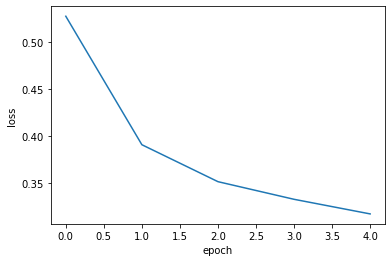

In [8]:
# 손실과 정확도를 그래프로 그리기

plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

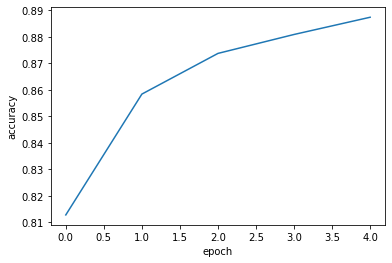

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [10]:
# 에포크를 늘려서 모델을 훈련하고 그래프 그리기

model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

history = model.fit(train_scaled, train_target, epochs=20, verbose=0)

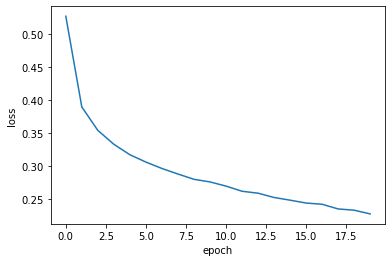

In [11]:
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 검증 손실